# [Text to Model Editing (TIME)](https://arxiv.org/abs/2303.08084)

In [1]:
import torch
from diffusers import DiffusionPipeline

## Define parameters

In [2]:
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
custom_pipeline = "py-img-gen/stable-diffusion-text-to-model-editing"

seed = 19950815
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load the pipeline

In [3]:
pipe = DiffusionPipeline.from_pretrained(
    model_id,
    custom_pipeline=custom_pipeline,
)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

PNDMScheduler for this pipeline is currently not supported.


## Generate image with original pipeline

  0%|          | 0/50 [00:00<?, ?it/s]

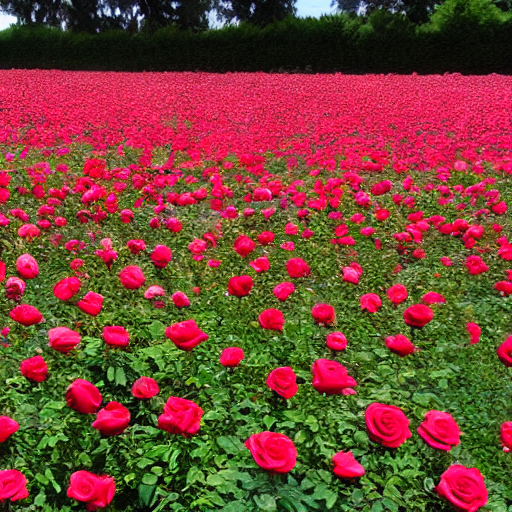

In [4]:
prompt = "A field of roses"

output = pipe(prompt=prompt, generator=torch.manual_seed(seed))
image_original = output.images[0]
image_original

## Generate image with edited pipeline

  0%|          | 0/50 [00:00<?, ?it/s]

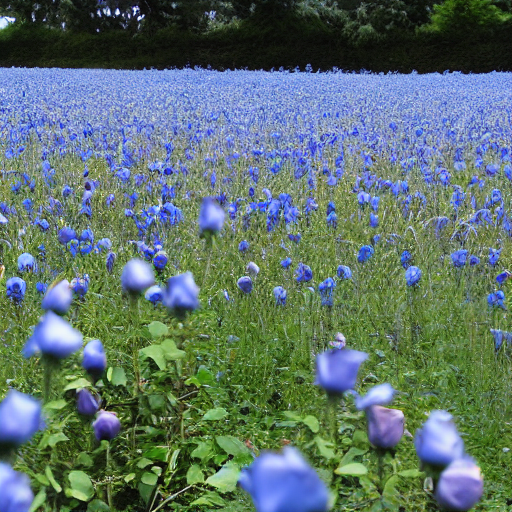

In [5]:
source_prompt = "A pack of roses"
destination_prompt = "A pack of blue roses"

pipe.edit_model(
    source_prompt=source_prompt,
    destination_prompt=destination_prompt,
)

output = pipe(prompt=prompt, generator=torch.manual_seed(seed))
image_edited = output.images[0]
image_edited

## Compare the generation results

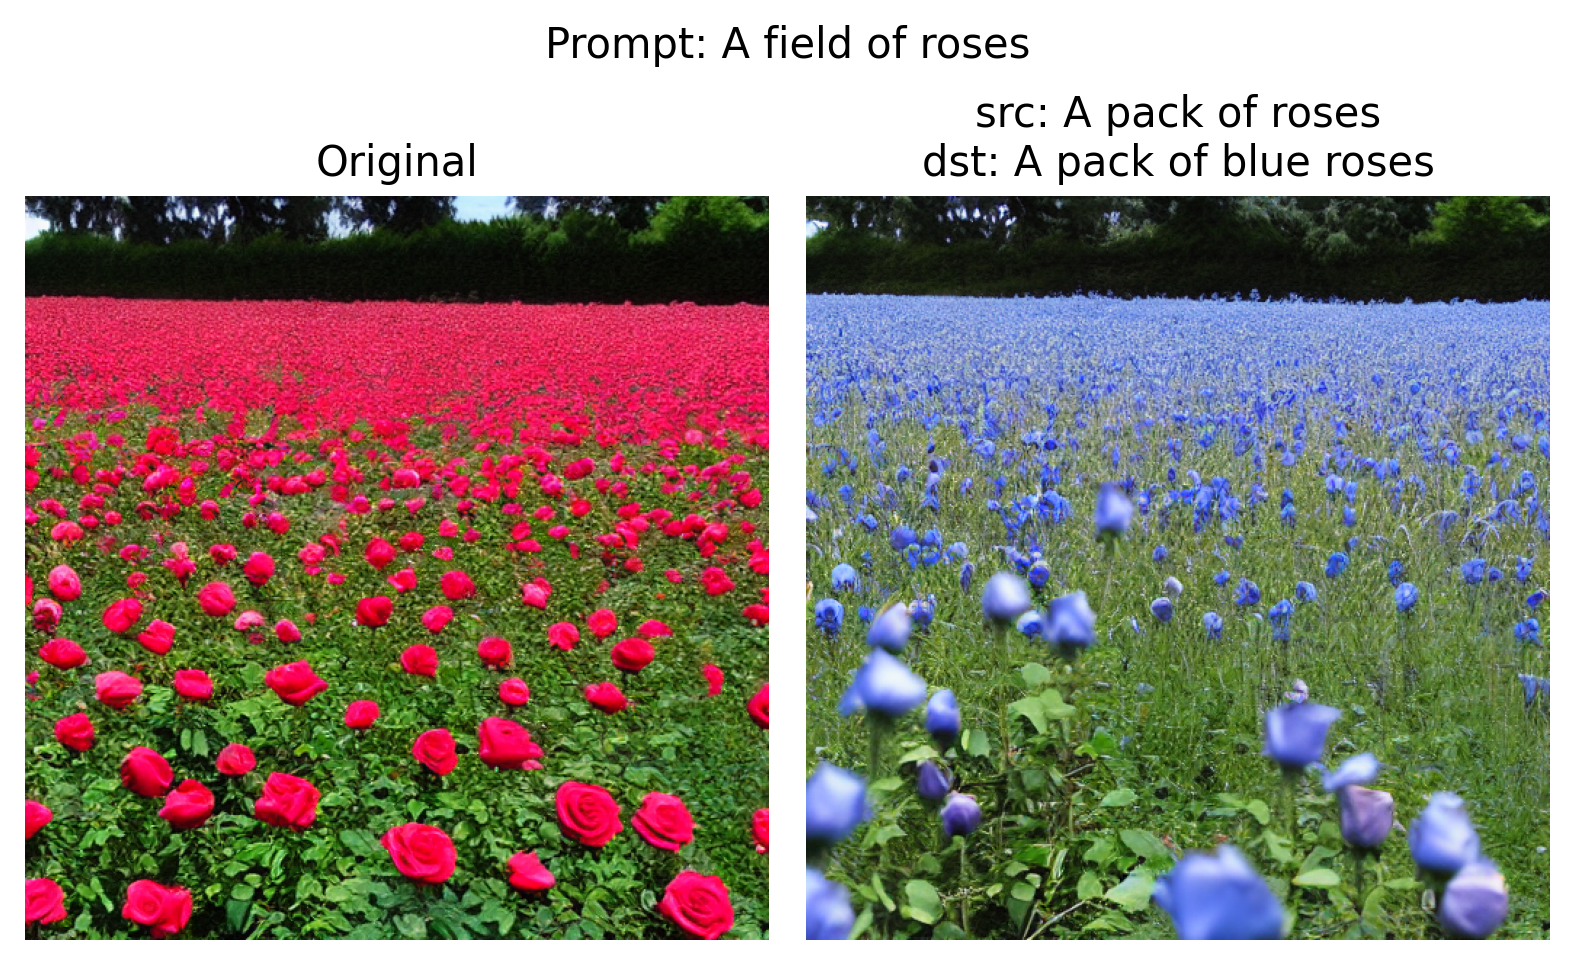

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, dpi=250)
fig.suptitle(f"Prompt: {prompt}", y=0.92)

axes[0].imshow(image_original)
axes[0].set_title("Original")
axes[0].set_axis_off()

axes[1].imshow(image_edited)
axes[1].set_title(
    f"src: {source_prompt}\n"
    f"dst: {destination_prompt}"
)
axes[1].set_axis_off()

fig.tight_layout()